In [1]:
import torch

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

from model import Model
from custom_utils import load_diseases_data, load_diseases_test_data
from nets import ResNet

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [2]:
train_images, train_labels, test_images, test_labels = load_diseases_data()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

(torch.Size([1894, 150, 100]),
 torch.Size([1894, 5, 2]),
 torch.Size([335, 150, 100]),
 torch.Size([335, 5, 2]))

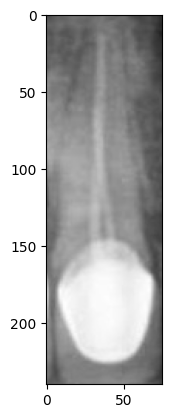

In [51]:
import cv2
img = cv2.imread(f'../data/single_tooth/images/121.jpg')
plt.imshow(img)

In [52]:
net = torch.load('../main_models/disease_resnet.pt')

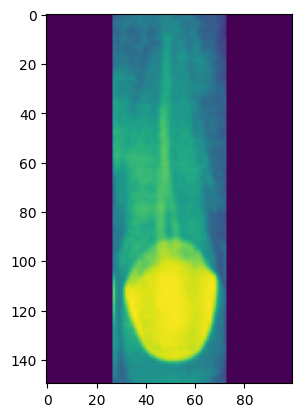

In [53]:
from image_processing import Processing

img = Processing.process_image(img, (150, 100))
plt.imshow(img)

In [54]:
img = torch.tensor(img / 255.).to(device).float()

In [57]:
img = img[None]
img.shape

torch.Size([1, 150, 100])

In [62]:
output = net(img)

results = torch.argmax(output, axis=-1)

print('Մոդելի արդյունքը`\n', output, '\n')
print('Հայտանիշների արժեքները։', results)

Մոդելի արդյունքը`
 tensor([[[ 1.0013e+00,  5.1761e-04],
         [ 9.9834e-01,  5.1528e-04],
         [ 1.3293e-03,  9.9877e-01],
         [ 1.0009e+00, -3.6520e-04],
         [ 3.5995e-03,  9.9741e-01]]], device='cuda:0',
       grad_fn=<ReshapeAliasBackward0>) 

Հայտանիշների արժեքները։ tensor([[0, 0, 1, 0, 1]], device='cuda:0')


In [64]:
from xray_detection import XRayDetection, Conv

XRayDetection.generate_diagnosis('21', results)

AttributeError: Can't get attribute 'Conv' on <module '__main__'>

In [3]:
images, labels = load_diseases_test_data()

In [3]:
images, labels = load_diseases_test_data()

x = []

for i in range(5):
    x.append(str((torch.argmax(net(images), axis=-1)[:, i] == torch.argmax(labels, axis=-1)[:, i]).sum().item() / labels.size(0) * 100))

x.append(str((torch.argmax(net(images), axis=-1) == torch.argmax(labels, axis=-1)).sum().item() / labels.size(0) * 20))

with open('seperate.csv', 'a') as file:
    file.write('CNN+ResNet,' + ','.join(x) + '\n')

In [4]:
(torch.argmax(net(images), axis=-1) == torch.argmax(labels, axis=-1)).sum().item() / labels.size(0) * 20

90.07299270072993

In [13]:
print( 'train mse:', torch.nn.MSELoss()( net(train_images), train_labels ).item() )
print( 'test mse:', torch.nn.MSELoss()( net(test_images), test_labels ).item() )

train mse: 0.00014825667312834412
test mse: 0.010521660558879375


In [8]:
print( 'train mse:', torch.nn.MSELoss()( net(train_images), train_labels ).item() )
print( 'test mse:', torch.nn.MSELoss()( net(test_images), test_labels ).item() )

train mse: 0.00006
test mse: 0.01442


In [14]:
print('train accuracy:', (torch.argmax(net(train_images), axis=-1) == torch.argmax(train_labels, axis=-1)).sum().item() / train_labels.size(0) * 20)
print('test accuracy:', (torch.argmax(net(test_images), axis=-1) == torch.argmax(test_labels, axis=-1)).sum().item() / test_labels.size(0) * 20)

train accuracy: 99.97888067581837
test accuracy: 98.86567164179105


In [9]:
print('train accuracy: 99.989\ntest accuracy: 98.388')

train accuracy: 99.989
test accuracy: 98.388


In [4]:
net = ResNet().to(device)
net

ResNet(
  (conv): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (13): Flatten(start_dim=1, end_dim=-1)
  )
  (d1): Linear(in_features=1280, out_features=500, bias=True)
  (d2): Linear(in_features=500, out_features=200, bias=True)
  (d2_res): Linear(in_features=200, out_features=200, bias=True)
  (d3): Linear(in_features=200, out_fea

In [5]:
disease_indxs = torch.unique(torch.where(train_labels[:, :, 1] == 1)[0])
disease_indxs.shape

torch.Size([1303])

In [6]:
model = Model(
    model=net, 
    train_input=train_images, #[disease_indxs], 
    train_label=train_labels, #[disease_indxs],
    test_input=test_images,
    test_label=test_labels
)

In [9]:
model.compile(
    optimizer=torch.optim.Adam, 
    lr=0.0001,
    loss=torch.nn.MSELoss()
)

In [10]:
model.train(
    epochs=100,
    batch_size=16
)

EPOCH [1/100], ====================> 100%, Loss = 2.7177271476830356e-05, Accuracy = 100.0
Loss = 0.00092, Accuracy = 99.894%
Test loss = 0.01218, Test accuracy = 98.627%
EPOCH [2/100], ====================> 100%, Loss = 7.40954201319255e-05, Accuracy = 100.0
Loss = 0.00086, Accuracy = 99.905%
Test loss = 0.01212, Test accuracy = 98.687%
EPOCH [3/100], ====================> 100%, Loss = 9.0829620603472e-05, Accuracy = 100.00
Loss = 0.00083, Accuracy = 99.905%
Test loss = 0.01155, Test accuracy = 98.687%
EPOCH [4/100], ====================> 100%, Loss = 0.0036202736664563417, Accuracy = 100.0
Loss = 0.00082, Accuracy = 99.905%
Test loss = 0.01102, Test accuracy = 98.806%
EPOCH [5/100], ====================> 100%, Loss = 7.999406079761684e-05, Accuracy = 100.0
Loss = 0.00075, Accuracy = 99.915%
Test loss = 0.01144, Test accuracy = 98.746%
EPOCH [6/100], ====================> 100%, Loss = 8.937942038755864e-05, Accuracy = 100.0
Loss = 0.00074, Accuracy = 99.915%
Test loss = 0.01119, Test 

In [12]:
torch.where(test_labels[:, 3, 1] == 1)

(tensor([  4,  45,  46,  47,  54,  55,  56, 220, 221, 288], device='cuda:0'),)

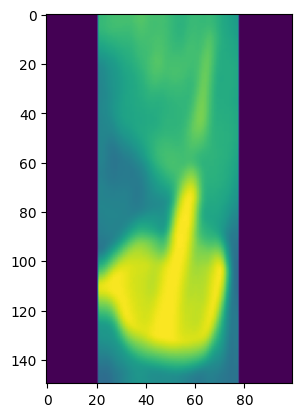

In [15]:
plt.imshow(test_images[4].cpu().numpy())

In [16]:
net(test_images[None, 4]), test_labels[4]

(tensor([[[ 9.9348e-01,  3.1916e-03],
          [ 1.0029e+00, -1.5261e-03],
          [-8.3315e-04,  1.0010e+00],
          [ 2.3805e-03,  1.0007e+00],
          [-4.3479e-03,  1.0009e+00]]], device='cuda:0',
        grad_fn=<ReshapeAliasBackward0>),
 tensor([[1., 0.],
         [1., 0.],
         [0., 1.],
         [0., 1.],
         [0., 1.]], device='cuda:0'))

<Figure size 640x480 with 0 Axes>

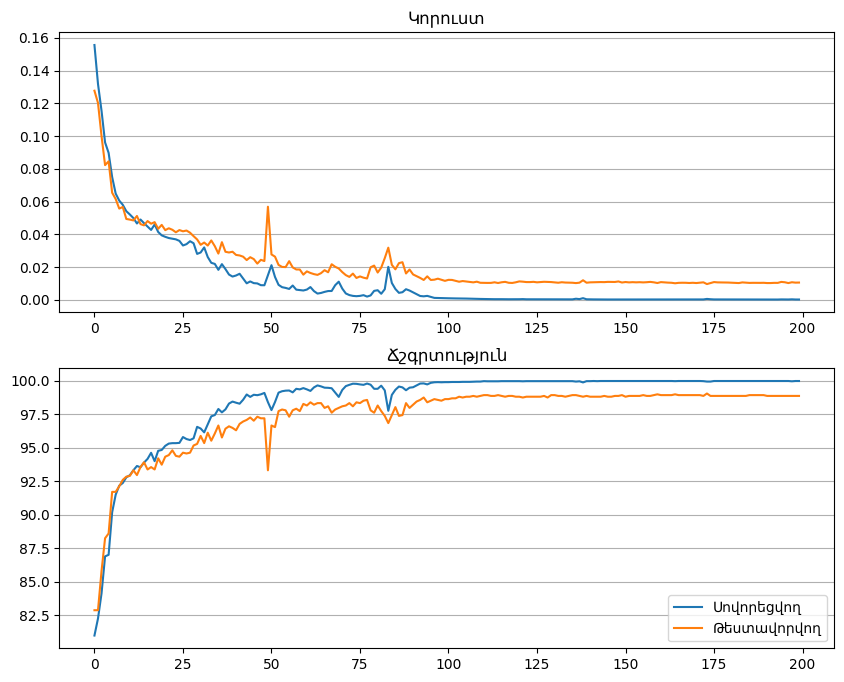

In [11]:
model.draw_plots()

In [12]:
# torch.save(net, '../models/disease_resnet.pt')

In [ ]:
(train_labels[:, 0, 1] == 1).sum(), (train_labels[:, 1, 1] == 1).sum(), (train_labels[:, 2, 1] == 1).sum(), (train_labels[:, 3, 1] == 1).sum(), (train_labels[:, 4, 1] == 1).sum()

(tensor(554, device='cuda:0'),
 tensor(676, device='cuda:0'),
 tensor(121, device='cuda:0'),
 tensor(74, device='cuda:0'),
 tensor(260, device='cuda:0'))

In [ ]:
(test_labels[:, 0, 1] == 1).sum(), (test_labels[:, 1, 1] == 1).sum(), (test_labels[:, 2, 1] == 1).sum(), (test_labels[:, 3, 1] == 1).sum(), (test_labels[:, 4, 1] == 1).sum()

(tensor(102, device='cuda:0'),
 tensor(120, device='cuda:0'),
 tensor(17, device='cuda:0'),
 tensor(10, device='cuda:0'),
 tensor(38, device='cuda:0'))

In [ ]:
(train_labels.sum(axis=1)[:, 0] == 5).sum()

tensor(593, device='cuda:0')

In [ ]:
(test_labels.sum(axis=1)[:, 0] == 5).sum()

tensor(106, device='cuda:0')

In [ ]:
train_labels.size(0)

1894

In [ ]:
test_labels.size(0)

335